# Signal processing for bio-image analysts.

## Reducing Dimensionality

### Profile plots

To create a profile plot we sample all the intensity values on a line segment from the start of the segment to the end of the segment. The x-axis of the plot represents the distance from the start point of the line-segment and the y-axis the intensity value in the image at that position.

Intensity changes and the base-line intensity, that represents the background intensity in the image can be easier to see in the profile plot than in the image.

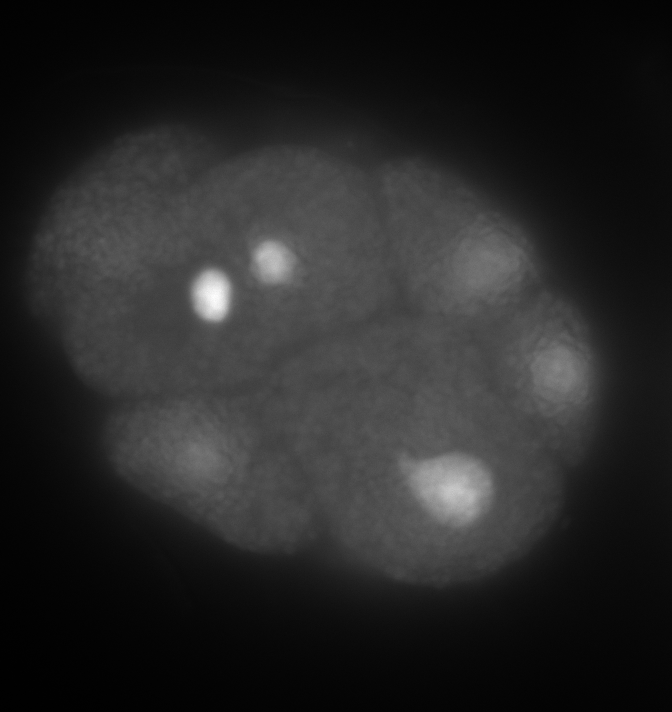

null

In [2]:
%%groovy
import net.imglib2.img.display.imagej.ImageJFunctions
dapi = ij2.io().open("../data/CElegans-DAPI/Data-DAPI-Z072.tif")
ip = ImageJFunctions.wrap(dapi, "dapi")
ip.getProcessor().setMinAndMax(ip.getProcessor().getStatistics().min, 
                               ip.getProcessor().getStatistics().max)
display(Image(ip.getBufferedImage()))

We create a line from the upper-left to the lower-right corner and sample the pixel values in the image along the line.

In [3]:
%%groovy
import net.imglib2.algorithm.region.BresenhamLine
import net.imglib2.Point
import net.imagej.axis.Axes

line = new BresenhamLine(dapi.randomAccess(), 
                         new Point(0, 0), 
                         new Point(dapi.dimension(dapi.dimensionIndex(Axes.X))-1, 
                         dapi.dimension(dapi.dimensionIndex(Axes.Y))-1))
profile = []
line.reset()

while (line.hasNext()) {
    line.fwd();
    profile.add(line.get().getInteger())
}
beakerx.profileData = profile
OutputCell.HIDDEN

We copy the profile-data from the beakerx object and display it in an interactive beakerx plot.

In [4]:
from beakerx.object import beakerx
from beakerx import *
import numpy as np
intensities = np.array(beakerx.profileData, dtype='int')
pp = Plot(title='Profile Plot', 
          xLabel="distance", 
          yLabel="intensity", 
          legendLayout=LegendLayout.HORIZONTAL,
          legendPosition=LegendPosition(position=LegendPosition.Position.RIGHT),
          omitCheckboxes=True)
pp.add(Line(displayName="intensity profile of the diagonal from the upper left to the lower right corner",  
            y=intensities))

In [6]:
%%groovy
%classpath add jar ../Fiji.app/jars/*
%classpath add jar ../Fiji.app/jars/bio-formats/*
currentPath = System.getProperty("java.library.path")
newPath = currentPath + ":../Fiji.app/lib/linux64"
System.setProperty( "java.library.path", newPath )
import net.imagej.ImageJ
ij2 = new ImageJ()

net.imagej.ImageJ@4dc4db39